### Формирование модели монетизации игры «Космические братья»

<b>Описание:</b>
#### проанализировать рекламные источники</br>
#### сформировать модель монетизации игры</br>
#### презентовать полученные результаты</br>
<br><b>Цель:</b></br>
<br>Найти самый перспективный рекламный источник</br>
<br></br>
<br><b>Данные:</b></br>
#### **Описание данных:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях.

Датасет *ad_costs.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

### Загрузка данных и изучение общей информации

#### Импортируем необходимые библиотеки для работы

In [1]:
#Импортируем все необходимые библиотеки для работы 
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
import math as mth
from scipy import stats as st
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.simplefilter('ignore')
import folium 
from folium import Map, Marker, Choropleth
from folium.plugins import MarkerCluster
import json

#### Смотрим на содержание датасетов

In [2]:
game_actions = pd.read_csv('/datasets/game_actions.csv')

In [3]:
game_actions.head(10)

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
5,2020-05-04 00:00:36,building,assembly_shop,06c592ca-902d-42bb-bac3-75ce84cca159,NaN
6,2020-05-04 00:00:36,building,assembly_shop,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN
7,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,NaN
8,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,NaN
9,2020-05-04 00:01:33,building,assembly_shop,fa352362-d258-472c-b295-2796ccc39fa3,NaN


In [4]:
ad_costs = pd.read_csv('/datasets/ad_costs.csv')

In [5]:
ad_costs.head(10)

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [6]:
user_source = pd.read_csv('/datasets/user_source.csv')

In [7]:
user_source.head(10)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
5,003b80c6-4164-4157-bb2a-03d0181d39c4,yandex_direct
6,003ee7e8-6356-4286-a715-62f22a18d2a1,instagram_new_adverts
7,004074f8-251a-4776-922c-8348dca1a2f6,facebook_ads
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,facebook_ads
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,yandex_direct


На первый взгляд, все датасеты вполне нормально выглядят, пока не понятно на что обращать внимание. Нужно провести предобработку данных, посмотреть дубликаты, пропуски, посмотреь на типы данных. 

### Предобработка данных 

#### Проверка датасетов на дубликаты(явные/неявные)

#### Проверка датасетов на пропуски

#### Проверка датасетов на верные типы данных

#### Проверка регистров полей, датасетов

In [56]:
#Напишем функцию для первичной проверки датасетов
def primary_processing(x, y, z):
    display('Получение первых 5 строк датасетов')
    display(x.head())
    display(y.head())
    display(z.head())
    print('*'*50)
    display('Статистические показатели датасетов')
    display(x.describe())
    display(y.describe())
    display(z.describe())
    print('*'*50)
    display('Количество строк и столбцов')
    display(x.shape)
    display(y.shape)
    display(z.shape)
    print('*'*50)
    display('Наличие дубликатов в датасетах')
    display(x.duplicated().sum())
    display(y.duplicated().sum())
    display(z.duplicated().sum())
    print('*'*50)
    display('Наличие пропусков в датасетах')
    display(x.isna().sum())
    display(y.isna().sum())
    display(z.isna().sum())
    # преобразование названий столбцов к нижнему регистру и заполнение пробелов на нижнее подчеркивание
    x.columns = [a.lower().replace(' ', '_') for a in x.columns]
    y.columns = [a.lower().replace(' ', '_') for a in y.columns]
    z.columns = [a.lower().replace(' ', '_') for a in z.columns]

primary_processing(game_actions, ad_costs, user_source)

'Получение первых 5 строк датасетов'

,event_datetime,event,building_type,user_id,project_type,day
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04


,source,day,cost
0,facebook_ads,2020-05-04,935.882786
1,facebook_ads,2020-05-05,548.354480
2,facebook_ads,2020-05-06,260.185754
3,facebook_ads,2020-05-07,177.982200
4,facebook_ads,2020-05-08,111.766796


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


**************************************************


'Статистические показатели датасетов'

,event_datetime,event,building_type,user_id,project_type,day
count,135640,135640,127957,135640,1866,135640
unique,128790,3,3,13576,1,33
top,2020-05-07 03:10:43,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly,2020-05-10 00:00:00
freq,4,127957,59325,22,1866,15208
first,2020-05-04 00:00:01,NaN,NaN,NaN,NaN,2020-05-04 00:00:00
last,2020-06-05 12:32:49,NaN,NaN,NaN,NaN,2020-06-05 00:00:00


,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


,user_id,source
count,13576,13576
unique,13576,4
top,a2987f04-5c30-4738-93c0-9004f98ac945,yandex_direct
freq,1,4817


**************************************************


'Количество строк и столбцов'

(135640, 6)

(28, 3)

(13576, 2)

**************************************************


'Наличие дубликатов в датасетах'

1

0

0

**************************************************


'Наличие пропусков в датасетах'

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
day                    0
dtype: int64

source    0
day       0
cost      0
dtype: int64

user_id    0
source     0
dtype: int64

In [53]:
#меняем тип данных в датасетах с obj на data 
game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'])
ad_costs['day'] = pd.to_datetime(ad_costs['day'])


In [10]:
ad_costs['cost'].describe()

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64

<div class="alert alert-info"> <b>Вывод: Все поля датасета, изначально соответствовали нижнему регистру, и менять их не было необходимости. Так же все поля соответсвуют своим описаниям. В датасете game_actions был найден 1 дубликат, остальные не имели дубликатов. Было установлено, что датасет game_actions так же содержит большое количество пропусков в столбцах с типом проекта и типом построения. Пока не понятно с чем это может быть связано, но заполнять или же избавляться от них будет не корректно, т.к. они очень велики и исказят анализ. Были изменены типы данных в столбцах event_datetime и day, датасетов game_actions и ad_costs, с obj на datetime.</b></div>

### Исследовательский анализ

In [11]:
#Добавим в датасет столбец с датой события
game_actions['day'] = game_actions['event_datetime'].dt.date.astype('datetime64[D]')

In [12]:
#найдем время первого действия, последнего действия, количество действий, количество зданий, признак постройки проекта
profile = game_actions.sort_values(
    by=(['user_id', 'event_datetime'])).groupby('user_id').agg({
        'event_datetime': ['first', 'last'],
        'day':
        'first',
        'event':
        'count',
        'building_type':
        'count',
        'project_type':
        'nunique'
    }).reset_index()

profile.columns = [
    'user_id', 'first_event_time', 'last_event_time', 'first_day',
    'events_count', 'buildings_count', 'project_mark'
]

In [13]:
#считаем время затраченое на прохождение уровня
profile['stage_duration'] = (
    (profile['last_event_time'] - profile['first_event_time']) /
    np.timedelta64(1, 'D')).astype(int)

In [14]:
#добавляем маркер о завершении раунда
finished_users = game_actions.query(
    'event == "finished_stage_1"')['user_id'].unique()


def finish_mark(df):
    if df['user_id'] in finished_users:
        if df['project_mark'] == 1:
            return 'made_project'
        else:
            return "defeated_enemy"
    else:
        return "dont_finished"


profile['finish_mark'] = profile.apply(finish_mark, axis=1)

profile = profile.drop('project_mark', axis=1)


In [15]:
# считаем затраты на каждого пользователя
profile = profile.merge(user_source, on='user_id')

ad_costs['day'] = ad_costs['day'] + np.timedelta64(1, 'D')

users_costs = profile.groupby(['first_day', 'source']).agg({
    'user_id': 'nunique'
}).reset_index()

users_costs = users_costs.merge(ad_costs,
                                left_on=['source', 'first_day'],
                                right_on=['source', 'day']).reset_index()

users_costs['cost_per_user'] = users_costs['cost'] / users_costs['user_id']

users_costs = users_costs[['source', 'first_day', 'cost_per_user']]

profile = profile.merge(users_costs, on=['source', 'first_day'])

profile.head()

,user_id,first_event_time,last_event_time,first_day,events_count,buildings_count,stage_duration,finish_mark,source,cost_per_user
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,2020-05-06,13,13,14,dont_finished,facebook_ads,0.754162
1,01303c2e-7de1-4742-8c3e-daf182b67b9f,2020-05-06 07:05:11,2020-05-08 22:30:49,2020-05-06,4,4,2,dont_finished,facebook_ads,0.754162
2,0136963c-c45c-4edb-92d8-205bd50a4d36,2020-05-06 14:00:20,2020-05-25 08:56:48,2020-05-06,12,10,18,made_project,facebook_ads,0.754162
3,018793d6-38c8-450a-bd54-8c181d920f1a,2020-05-06 07:05:52,2020-05-24 23:52:53,2020-05-06,14,12,18,made_project,facebook_ads,0.754162
4,01e2b256-4519-493f-b010-4a90a2755245,2020-05-06 22:16:07,2020-05-21 04:52:31,2020-05-06,9,9,14,dont_finished,facebook_ads,0.754162


<div class="alert alert-info"> <b>Собрали профили пользователей для удобного анализа. Посчитали средние затраты на 1 пользователя, добавили метки стратегий пользователей (pve,researcher,dont_finished).Количество затрачиваемого времени на прохождение уровня, дату события, и источник с которого пришёл пользователь.</b></div>

#### Проверить количество рекламных источников и среднюю стоимость кликов

In [16]:
#Смотрим на количество рекламных источников
number_of_sources = ad_costs.groupby('source')['source'].nunique()
number_of_sources

source
facebook_ads               1
instagram_new_adverts      1
yandex_direct              1
youtube_channel_reklama    1
Name: source, dtype: int64

<div class="alert alert-info"> <b>В датасете всего 4 источника. Посмотрим на среднюю стоимость всех кликов по источникам, узнаем сколько потратили денежных средств и куда.</b></div>

In [17]:
#Смотрим на медиану стоимости всех кликов по источникам привлечения
avg_costs = round((ad_costs.pivot_table(index='source',values='cost',aggfunc='mean')
             .sort_values(by='cost',ascending=False)
             .reset_index()),2)
avg_costs

,source,cost
0,yandex_direct,319.02
1,instagram_new_adverts,308.78
2,facebook_ads,305.84
3,youtube_channel_reklama,152.59


<div class="alert alert-info"> <b>Самым дорогим источником оказался yandex_direct со средними затратами почти в 320 долларов и самым дешёвым youtube_channel_reklama почти в 153 доллара. Теперь нужно посмотреть на среднюю стоимость 1 клика на 1 пользователя по источникам, так будет понятнее пользователи какого источника нам дороже обходятся.</b></div>

In [18]:
#Смотрим на среднюю стоимость клика на 1 пользователя по источникам 
costs_per_user = round((profile.pivot_table(index='source',values='cost_per_user',aggfunc='mean')
             .sort_values(by='cost_per_user',ascending=False)
             .reset_index()),2)
costs_per_user

,source,cost_per_user
0,facebook_ads,0.79
1,instagram_new_adverts,0.65
2,yandex_direct,0.46
3,youtube_channel_reklama,0.40


<div class="alert alert-info"> <b>Как странно, если на все клики мы тратили больше по источнику yandex_direct, то в разрезе на 1 пользователя, картина совершенно иная. Самый дорогой клик нам обходится в 0.79 доллара и принадлежит источнику facebook_ads, yandex_direct теперь расположился лишь на третьеё позиции со скромными 0.46 доллара. Но есть один источник который себе не изменяет это youtube_channel_reklama, он по прежнему замыкает таблицу, с нименьшей стоимостью клика в 0.40 доллара.</b></div>

##### Визуализация данных

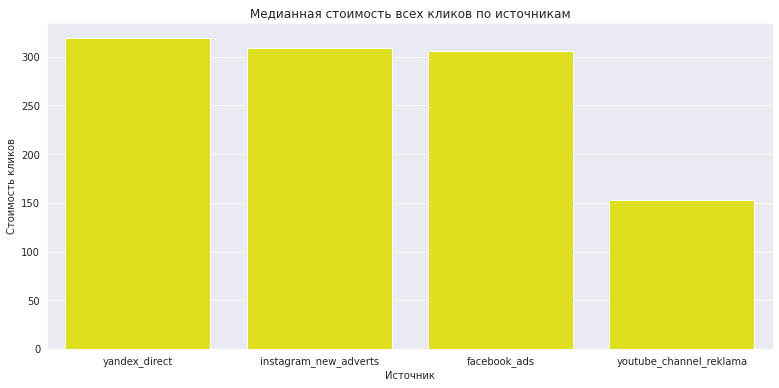

In [58]:
#Визуализируем данные из сводной таблицы
plt.figure(figsize=(13,6))
sns.barplot(x=avg_costs['source'],y=avg_costs['cost'],color='yellow')
plt.title("Медианная стоимость всех кликов по источникам")
plt.xlabel("Источник")
plt.ylabel("Стоимость кликов")
plt.show()

<div class="alert alert-info"> <b>Наглядно можно увидеть разницу в средней стоимости всех кликов по источникам. Как ранее уже говорилось yandex_direct занимает лидирующую позицию по затратам, и youtube самую низкую.</b></div>

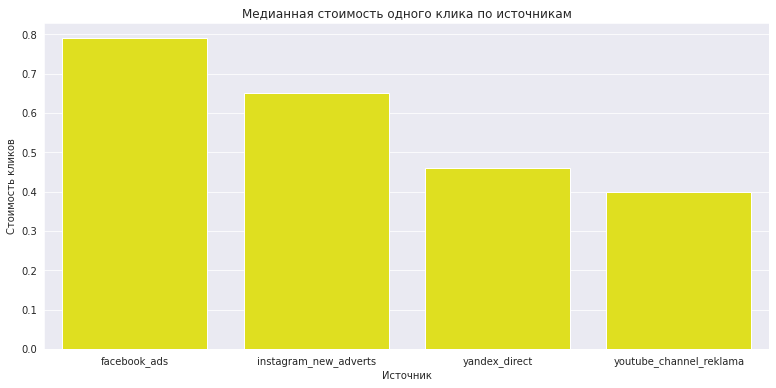

In [59]:
#Визуализируем данные из сводной таблицы
plt.figure(figsize=(13,6))
sns.barplot(x=costs_per_user['source'],y=costs_per_user['cost_per_user'],color='yellow')
plt.title("Медианная стоимость одного клика по источникам")
plt.xlabel("Источник")
plt.ylabel("Стоимость кликов")
plt.show()

<div class="alert alert-info"> <b>График говорит нам о средней стоимости за 1 клик на 1 пользователя по источникам. Самый дорогой facebook, самый дешёвый youtube.</b></div>

#### Оценить среднее число построек на пользователя по стратегиям, каналам

In [21]:
#Посмотрим на количество пользователей со стратегией PVE
quantity_bild_pve = (profile.query('finish_mark =="defeated_enemy"'))
quantity_bild_pve['user_id'].count()

3951

<div class="alert alert-info"> <b>Всего имеется 3951 пользователь со стратегией PVE. Посмотрим какое количество построек в среднем возводят такие пользователи. И посмотрим на то с какого источника таких пользователей больше приходит. </b></div>

In [22]:
#Найдём сначала среднее число построек на пользователя со стратегией победы над персонажем
quantity_bild_pve = (profile.query('finish_mark =="defeated_enemy"')
            .pivot_table(index='finish_mark',values='buildings_count',aggfunc='median')
            .sort_values(by='buildings_count',ascending=False)
            .reset_index())
quantity_bild_pve

,finish_mark,buildings_count
0,defeated_enemy,10


<div class="alert alert-info"> <b>В среднем пользователи со стратегией PVE, возводят по 10 строений. Пока не понятно плохо эти или хорошо, т.к. основная стратегия этих пользователей всё таки победить врага, а не завершить проект. Нужно посмотреть на пользователей которые придерживаются стратегии исследования, они должны оприоре строить больше.</b></div>

In [23]:
#посмотреть на то с какого канала приходит больше пользователей со стратегией pve.
pve_users_by_source = (profile.query('finish_mark =="defeated_enemy"')
                       .pivot_table(index='source',values='user_id',aggfunc='count')
                       .sort_values(by='user_id',ascending=False)
                       .reset_index())

pve_users_by_source

,source,user_id
0,yandex_direct,1422
1,instagram_new_adverts,990
2,youtube_channel_reklama,780
3,facebook_ads,759


<div class="alert alert-info"> <b>Пользователи со стратегией PVE, отдают "предпочтение" yandex_direct, с этого канала в игру поступило 1422 человека. Самым маленьким количеством таких пользователей обладает канал facebook, у него всего 759 что почти на 50% меньше чем у лидера данного "топа". </b></div>

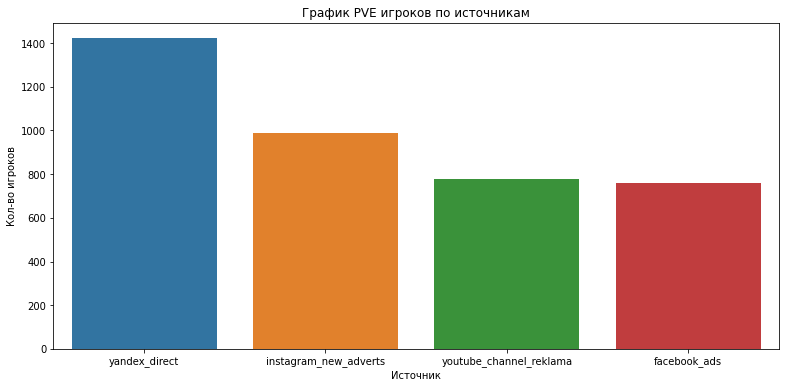

In [24]:
#Визуализируем данные из сводной таблицы
plt.figure(figsize=(13,6))
sns.barplot(x=pve_users_by_source['source'],y=pve_users_by_source['user_id'])
plt.title("График PVE игроков по источникам")
plt.xlabel("Источник")
plt.ylabel("Кол-во игроков")
plt.show()

<div class="alert alert-info"> <b>Наглядно можно видеть разницу в количестве пользователей между yandex_direct и facebook.</b></div>

In [25]:
#Посмотрим на количество исследователей 
quantity_bild_researchers = profile.query('finish_mark == "made_project"')
quantity_bild_researchers['user_id'].count()

1866

<div class="alert alert-info"> <b>Всего 1866 пользователей со стратегией исследователей, что почти в 2,1 раза меньше чем PVE игроков. Посмотрим на поведение этих пользователей, среднее количество построек и с какого источника таких пользователей приходит больше всего. </b></div>

In [26]:
#Смотрим на среднее количество построек у исследователей
quantity_bild_researchers = (profile.query('finish_mark == "made_project"')
                             .pivot_table(index='finish_mark',values='buildings_count',aggfunc='median')
                             .reset_index())
quantity_bild_researchers

,finish_mark,buildings_count
0,made_project,12


<div class="alert alert-info"> <b>Как оказалось исследователи и вправду строят чуть больше в реднем чем пользователи PVE стратегии, если у них было значение в 10 построек, то в данном же случае мы можем наблюдать прирост в среднем количестве построек на 2, и получам среднее количество в 12 сооружений в среднем на пользователя. </b></div>

In [27]:
#посмотреть на то с какого канала приходит больше исследователей.
researcher_users_by_source = (profile.query('finish_mark =="made_project"')
                       .pivot_table(index='source',values='user_id',aggfunc='count')
                       .sort_values(by='user_id',ascending=False)
                       .reset_index())

researcher_users_by_source

,source,user_id
0,yandex_direct,620
1,instagram_new_adverts,476
2,facebook_ads,391
3,youtube_channel_reklama,379


<div class="alert alert-info"> <b>В случае с исследователями лидером так же является yandex_direct со 620 пользователями, и аутсайдером youtube с 379 пользователями. Но в отличае от PVE игроков, падение по каналам более или менее плавное.</b></div>

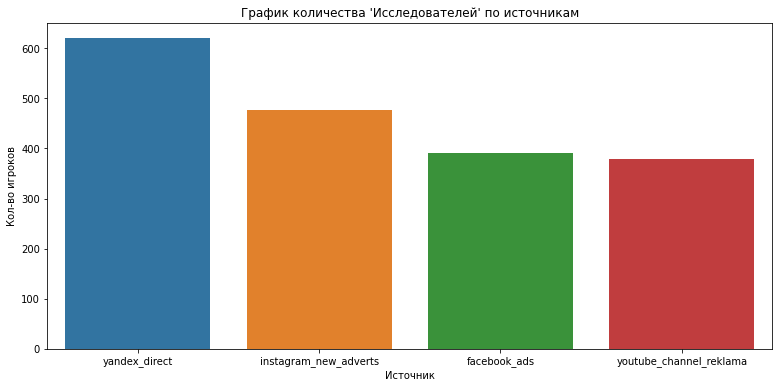

In [28]:
#Визуализируем данные из сводной таблицы
plt.figure(figsize=(13,6))
sns.barplot(x=researcher_users_by_source['source'],y=researcher_users_by_source['user_id'])
plt.title("График количества 'Исследователей' по источникам")
plt.xlabel("Источник")
plt.ylabel("Кол-во игроков")
plt.show()

<div class="alert alert-info"> <b>Как и в случае с PVE пользователями лидером остаётся yandex_direct - 620 пользователей. Что можно наблюдать на графике. Теперь остались только те кто не завершил уровень. Посмотрим общее количество таких пользователей и среднее количество построек.</b></div>

In [29]:
#Посмотрим на количество пользователей не завершивших уровень 
number_of_buildings_dont_finished = (profile.query('finish_mark =="dont_finished"'))
number_of_buildings_dont_finished['user_id'].count()

7759

<div class="alert alert-info"> <b>Пользователей не завершивших уровень оказалось практически на 40% больше чем исследователей и PVE игроков. Посмотрим чем они вообще занимаются, сколько строят, с какого источника приходят.</b></div>

In [30]:
#Смотрим на среднее количество построек у пользователей не закончивших уровень
number_of_buildings_dont_finished = (profile.query('finish_mark == "dont_finished"')
                             .pivot_table(index='finish_mark',values='buildings_count',aggfunc='median')
                             .reset_index())
number_of_buildings_dont_finished

,finish_mark,buildings_count
0,dont_finished,8


<div class="alert alert-info"> <b>Как и следовало ожидать "тунеядцы" не завершившие уровень строят в среднем по 8 сооружений. Посмотрим теперь откуда они к нам приходят.</b></div>

In [31]:
#посмотреть на то с какого канала приходит больше пользователей с незавершённым уровнем.
dont_finished_users_by_source = (profile.query('finish_mark =="dont_finished"')
                       .pivot_table(index='source',values='user_id',aggfunc='count')
                       .sort_values(by='user_id',ascending=False)
                       .reset_index())

dont_finished_users_by_source

,source,user_id
0,yandex_direct,2775
1,instagram_new_adverts,1881
2,facebook_ads,1576
3,youtube_channel_reklama,1527


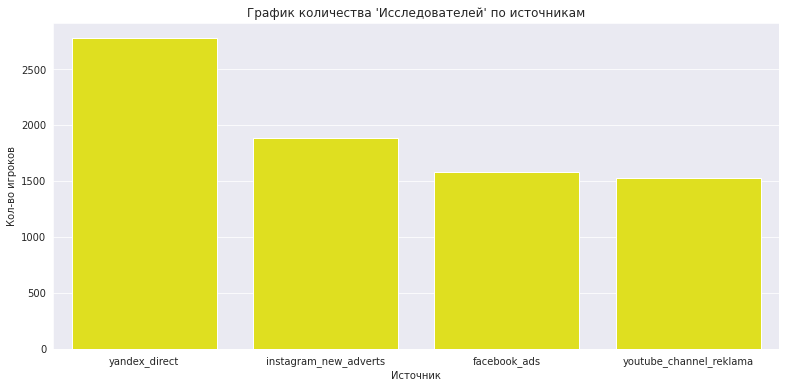

In [60]:
#Визуализируем данные из сводной таблицы
plt.figure(figsize=(13,6))
sns.barplot(x=dont_finished_users_by_source['source'],y=dont_finished_users_by_source['user_id'],color='yellow')
plt.title("График количества 'Исследователей' по источникам")
plt.xlabel("Источник")
plt.ylabel("Кол-во игроков")
plt.show()

<div class="alert alert-info"> <b>Основная масса таких пользователей приходит из yandex_direct 2775 пользователей, самым минимальным показателем обладает youtube 1527 пользователей.</b></div>

In [33]:
#Смотрим на количество построек по их категориям 
building = (game_actions.pivot_table(index='user_id',columns='building_type',values='event',aggfunc='count')
           .sort_values(by='user_id',ascending=False)
           .reset_index())
building

building_type,user_id,assembly_shop,research_center,spaceport
0,ffff69cc-fec1-4fd3-9f98-93be1112a6b8,3.0,3.0,6.0
1,ffff194a-56b7-4c12-860d-3485242ae7f5,6.0,NaN,1.0
2,fffb626c-5ab6-47c9-8113-2062a2f18494,4.0,2.0,3.0
3,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,5.0,3.0,8.0
4,ffef4fed-164c-40e1-bde1-3980f76d0fb5,7.0,1.0,1.0
...,...,...,...,...
13571,002f508f-67b6-479f-814b-b05f00d4e995,3.0,1.0,8.0
13572,001d39dc-366c-4021-9604-6a3b9ff01e25,4.0,NaN,4.0
13573,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2.0,NaN,2.0
13574,00151b4f-ba38-44a8-a650-d7cf130a0105,4.0,NaN,5.0


<div class="alert alert-info"> <b>Мы это делаем для того что бы в дальнейшем посмотреть на то как распределяются разные типы строений на пользователей с разными стратегиями.</b></div>

In [34]:
#Смотрим на количество построек по стратегиям и категориям
buildings_by_source = profile.merge(building[['user_id','assembly_shop','research_center','spaceport']], on='user_id'
    )
buildings = (buildings_by_source.pivot_table(index='finish_mark',values=['assembly_shop','research_center','spaceport'],aggfunc='sum')
             .sort_values(by='spaceport',ascending=True)
             .reset_index()
            )
buildings

,finish_mark,assembly_shop,research_center,spaceport
0,made_project,9116.0,3697.0,10788.0
1,defeated_enemy,16298.0,3755.0,17132.0
2,dont_finished,29080.0,6686.0,31405.0


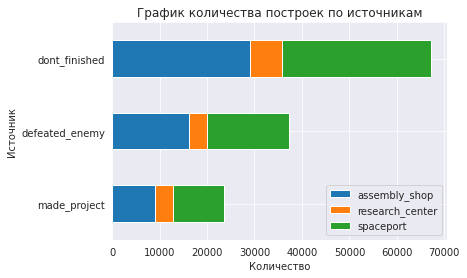

In [35]:
sns.set_style('dark')
# назначаем размер графика

buildings.plot(x='finish_mark',y= ['assembly_shop','research_center','spaceport'],\
              kind='barh', stacked= True )
plt.title('График количества построек по источникам')
plt.xlabel('Количество')
plt.ylabel('Источник')
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

<div class="alert alert-info"> <b>Видно что в основном все пользователи строят в равных долях spaceport и assembly_shop, и минимальное количество исследовательских центров. Видимо согласно логики игры достаточно небольшого количество данных сооружений. Что косается общего количества построек, то пользователи которые не прошли уровень, построили куда больше чем исследователи и PVE игроки. Теперь нужно взглянуть на среднее количество времени проведённом в игре и затрачиваемое на прохождение уровня.</b></div>

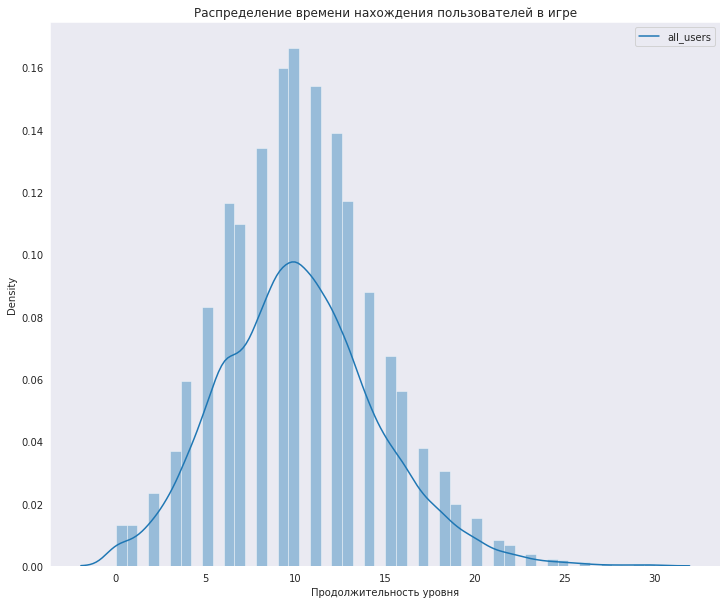

In [36]:
#Строим график проведённого времени в игре
plt.figure(figsize=(12, 10))

sns.distplot(profile['stage_duration'], bins=50, kde_kws={'label': 'all_users'})

plt.title('Распределение времени нахождения пользователей в игре');
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Продолжительность уровня')
plt.show()

In [37]:
print('Медианное значение времени нахождения пользователей в игре {} дней'.
      format(profile['stage_duration'].median()))

Медианное значение времени нахождения пользователей в игре 10.0 дней


<div class="alert alert-info"> <b>Как покуазывает график, среднее время в игре пользователи проводят 10 дней.</b></div>

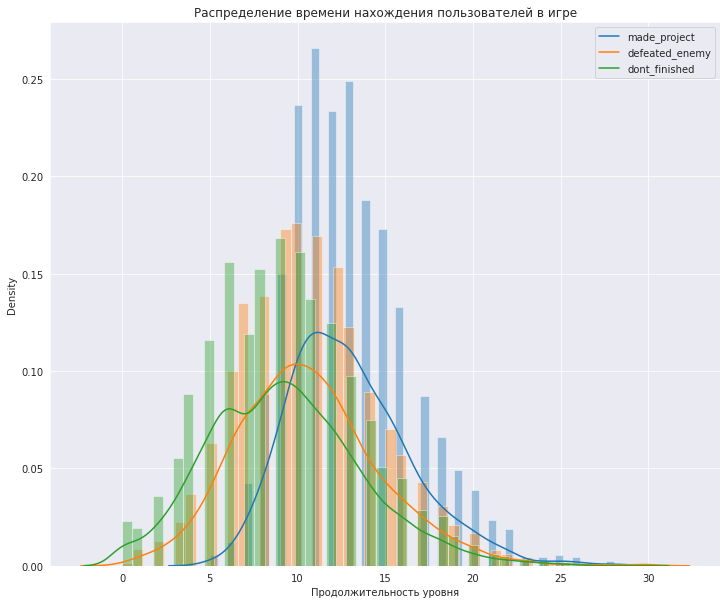

In [38]:
#Строим график количетва времения необходимого для проходжения уровня для пользователей всех стратегий
plt.figure(figsize=(12, 10))

sns.set_style('darkgrid')

made_project = profile.query('finish_mark == "made_project"')['stage_duration']

sns.distplot(profile.query('finish_mark == "made_project"')['stage_duration'],
             bins=50,
             kde_kws={'label': 'made_project'})

sns.distplot(profile.query('finish_mark == "defeated_enemy"')['stage_duration'],
             bins=50,
             kde_kws={'label': 'defeated_enemy'})

sns.distplot(profile.query('finish_mark == "dont_finished"')['stage_duration'],
             bins=50,
             kde_kws={'label': 'dont_finished'})

plt.title('Распределение времени нахождения пользователей в игре')
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Продолжительность уровня')
plt.show()

In [39]:
print(
    'Медианное значение продолжительности уровня, для тех кто завершил уровень созданием проекта {} дней'
    .format(
        profile.query('finish_mark == "made_project"')
        ['stage_duration'].median()))
print(
    'Медианное значение продолжительности уровня, для тех кто завершил уровень победой на врагом {} дней'
    .format(
        profile.query('finish_mark == "defeated_enemy"')
        ['stage_duration'].median()))
print(
    'Медианное значение продолжительности уровня, для тех кто не завершил уровень {} дней'
    .format(
        profile.query('finish_mark == "dont_finished"')
        ['stage_duration'].median()))

Медианное значение продолжительности уровня, для тех кто завершил уровень созданием проекта 13.0 дней
Медианное значение продолжительности уровня, для тех кто завершил уровень победой на врагом 10.0 дней
Медианное значение продолжительности уровня, для тех кто не завершил уровень 9.0 дней


<div class="alert alert-info"> <b>Как видно по графику распределения и медианным значениям, пользователи находятся в игре 10 дней, кому-то этого времени хватает на прохождения уровня, а кто-то просто перестаёт играть. При этом, дольше всех проходят уровень исследователи - 13 дней. Кто идет путем победы над врагом, в среднем проходят уровень 10 дней. А те, кто в итоге уровень так и не проходит находятся в игре 9 дней.</b></div>

#### Визуализация динамики изменения расходов во времени (по дням) по каждому источнику.

In [40]:
#Соберём все необходимые данные для анализа из 3 таблиц 
spending_dynamics = profile
spending_dynamics.head()

,user_id,first_event_time,last_event_time,first_day,events_count,buildings_count,stage_duration,finish_mark,source,cost_per_user
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,2020-05-06,13,13,14,dont_finished,facebook_ads,0.754162
1,01303c2e-7de1-4742-8c3e-daf182b67b9f,2020-05-06 07:05:11,2020-05-08 22:30:49,2020-05-06,4,4,2,dont_finished,facebook_ads,0.754162
2,0136963c-c45c-4edb-92d8-205bd50a4d36,2020-05-06 14:00:20,2020-05-25 08:56:48,2020-05-06,12,10,18,made_project,facebook_ads,0.754162
3,018793d6-38c8-450a-bd54-8c181d920f1a,2020-05-06 07:05:52,2020-05-24 23:52:53,2020-05-06,14,12,18,made_project,facebook_ads,0.754162
4,01e2b256-4519-493f-b010-4a90a2755245,2020-05-06 22:16:07,2020-05-21 04:52:31,2020-05-06,9,9,14,dont_finished,facebook_ads,0.754162


In [41]:
spending_dynamics = (profile.pivot_table(index='first_day',columns='source',values='cost_per_user')
        .reset_index())
spending_dynamics['total_costs'] = (spending_dynamics['facebook_ads'] 
                                    +spending_dynamics['instagram_new_adverts']
                                    +spending_dynamics['yandex_direct']
                                    +spending_dynamics['youtube_channel_reklama'])
spending_dynamics

source,first_day,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama,total_costs
0,2020-05-04,0.790442,0.649590,0.466381,0.396357,2.302769
1,2020-05-05,0.790136,0.631816,0.459149,0.390759,2.271860
2,2020-05-06,0.754162,0.665193,0.464206,0.401753,2.285314
3,2020-05-07,0.794563,0.641004,0.458018,0.402300,2.295886
4,2020-05-08,0.804078,0.628087,0.478784,0.412894,2.323842
5,2020-05-09,0.809634,0.639096,0.437234,0.402179,2.288143
6,2020-05-10,0.691488,0.668220,0.480669,0.416333,2.256710


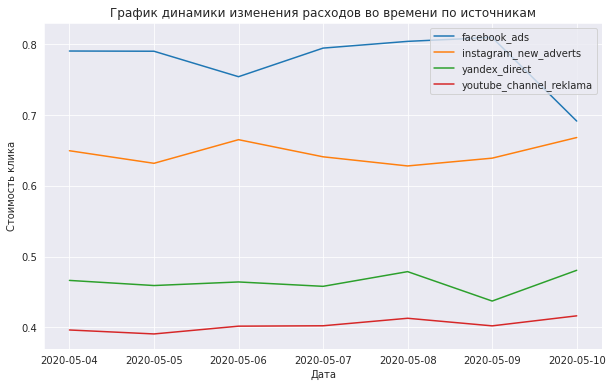

In [42]:
# Задаём размер графика 
plt.figure(figsize=(10,6))
# Строим график по источникам 
plt.plot(spending_dynamics['first_day'], spending_dynamics['facebook_ads'], label='facebook_ads')

plt.plot(spending_dynamics['first_day'], spending_dynamics['instagram_new_adverts'], label='instagram_new_adverts')

plt.plot(spending_dynamics['first_day'], spending_dynamics['yandex_direct'], label='yandex_direct')

plt.plot(spending_dynamics['first_day'], spending_dynamics['youtube_channel_reklama'], label='youtube_channel_reklama')

plt.ylabel('Стоимость клика')
plt.xlabel('Дата')
plt.title('График динамики изменения расходов во времени по источникам')
plt.legend() 
plt.show()

<div class="alert alert-info"> <b>Итак, если взглянуть на график, то можно увидеть тенденции движения цены за клик, согласно времени. Лидером этого "топа" является facebook c отметки в 0.79 доларов за клик и далее невысоким ростом а после и грандиозным падением до 0.69 доллара. Остальные же начиная со своей первоначальной цены за клик, наоборот сохраняют тенденцию роста. Так instagram_new_adverts начинал с 0.64 и в данный период цена стоит на отметке 0.66 долларов. yandex_direct с 0.46 до 0.48 долларов за клик, и youtube_channel_reklama с 0.39 до 0.41 доллара за клик. В последние дни имеется не так много событий и по этой причине излишняя волатильность может быть связана с малым числом наблюдений.</b></div>

### Проверка гипотез 

##### H0: Имеются различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.
##### H1: Нет различий времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком

In [43]:
#Собираем пользователей по времени прохождению и стратегиям 
duration_of_pve_players = profile.query(
    'finish_mark == "defeated_enemy"')['stage_duration']

researcher_duration = profile.query(
    'finish_mark == "made_project"')['stage_duration']

##### H0:Имеются различия в распределении данных 
##### H1:Различий в распределении данных нет 

In [44]:
#Посмотрим на то, нормально ли распределены данные в duration_of_pve_players
alpha = .05 

results = st.shapiro(duration_of_pve_players)# ваш код
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')# ваш код

p-значение:  3.3002471258616425e-24
Отвергаем нулевую гипотезу: распределение не нормально


In [45]:
#Посмотрим на то, нормально ли распределены данные в researcher_duration
alpha = .05 

results = st.shapiro(researcher_duration)# ваш код
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')# ваш код

p-значение:  4.1633364896051043e-22
Отвергаем нулевую гипотезу: распределение не нормально


<div class="alert alert-info"> <b>Оба распределения оказались не нормальны, что не позволяет нам применить критерий Стьюдента при проверке основной гипотезы, будем использовать критерий Манна-Уитни</b></div>

In [46]:
#Проверка основных гипотез 
alpha = .05

results = st.mannwhitneyu(duration_of_pve_players, researcher_duration,True,'less')# ваш код

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
      print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  7.405201249039567e-106
Отвергаем нулевую гипотезу: разница статистически значима


Медианное значение продолжительности уровня, для тех кто завершил уровень созданием проекта 13.0 дней
Медианное значение продолжительности уровня, для тех кто завершил уровень победой на врагом 10.0 дней
Медианное значение продолжительности уровня, для тех кто не завершил уровень 9.0 дней
**************************************************


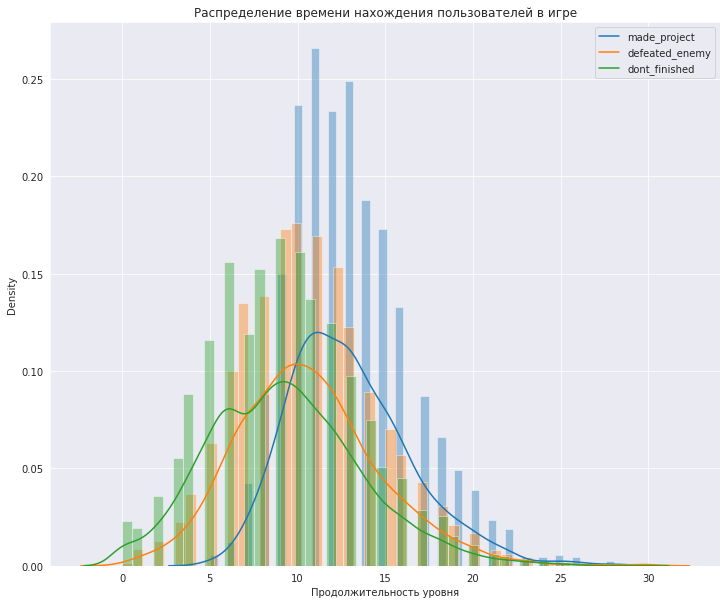

In [66]:
plt.figure(figsize=(12, 10))

sns.set_style('darkgrid')

sns.distplot(profile.query('finish_mark == "made_project"')['stage_duration'],
             bins=50,
             kde_kws={'label': 'made_project'})

sns.distplot(profile.query('finish_mark == "defeated_enemy"')['stage_duration'],
             bins=50,
             kde_kws={'label': 'defeated_enemy'})

sns.distplot(profile.query('finish_mark == "dont_finished"')['stage_duration'],
             bins=50,
             kde_kws={'label': 'dont_finished'})

plt.title('Распределение времени нахождения пользователей в игре');
plt.legend(loc='upper right', fontsize=10)
plt.xlabel('Продолжительность уровня');
print(
    'Медианное значение продолжительности уровня, для тех кто завершил уровень созданием проекта {} дней'
    .format(
        profile.query('finish_mark == "made_project"')
        ['stage_duration'].median()))
print(
    'Медианное значение продолжительности уровня, для тех кто завершил уровень победой на врагом {} дней'
    .format(
        profile.query('finish_mark == "defeated_enemy"')
        ['stage_duration'].median()))
print(
    'Медианное значение продолжительности уровня, для тех кто не завершил уровень {} дней'
    .format(
        profile.query('finish_mark == "dont_finished"')
        ['stage_duration'].median()))
print('*'*50)

<div class="alert alert-info"> <b>По результатам статистического теста мы отвергаем нулевую гипотезу, это позволяет нам говорить о том, что между пользователями со стратегией PVE и стратегией исследователей есть разница во времени на прохождение уровня. Исследователи дольше проходят уровень чем пользователи PVE.</b></div>

##### H0: Есть различие в количестве денежных затрат на пользователей завершившеих уровень победой над другим игроком и пользователями завершившими уровень через реализацию проекта.

##### H1: Нет различий в количестве денежных затрат на пользователей завершившеих уровень победой над другим игроком и пользователями завершившими уровень через реализацию проекта.

In [106]:
#Собираем пользователей по времени прохождению и стратегиям 
rich_of_pve_players = profile.query(
    'finish_mark == "defeated_enemy"')['cost_per_user']

rich_of_researcher_duration = profile.query(
    'finish_mark == "made_project"')['cost_per_user']

##### H0:Имеются различия в распределении данных 
##### H1:Различий в распределении данных нет 

In [107]:
#Посмотрим на то, нормально ли распределены данные в rich_of_pve_players
alpha = .05 

results = st.shapiro(rich_of_pve_players)# ваш код
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')# ваш код

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [108]:
#Посмотрим на то, нормально ли распределены данные в rich_of_researcher_duration
alpha = .05 

results = st.shapiro(rich_of_researcher_duration)# ваш код
p_value = results[
    1
]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')# ваш код

p-значение:  2.1033181663853353e-39
Отвергаем нулевую гипотезу: распределение не нормально


<div class="alert alert-info"> <b>Оба распределения оказались не нормальны, что не позволяет нам применить критерий Стьюдента при проверке основной гипотезы, будем использовать критерий Манна-Уитни</b></div>

In [109]:
#Проверка основных гипотез 
alpha = .05

results = st.mannwhitneyu(rich_of_pve_players, rich_of_researcher_duration,True,'less')# ваш код

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
      print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
      print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.18207002082938123
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


<div class="alert alert-info"> <b>По результатам статистического теста мы не можем отвергнуть нулевую гипотезу, это позволяет нам говорить о том, что между пользователями со стратегией PVE и стратегией исследователей нет разницы в денежных затратах.      На привлечение пользователей со стратегиями исследователи и PVE денежные затраты одинаковы.</b></div>

### Вывод

В ходе работы был проведен комплексный исследователский анализ данных о внутриигровых действиях пользователей, в ходе анализа выяснили:
Всего в датасетах присутствуют 4 рекламных источника:
<br>- facebook_ads </br>
<br>- instagram_new_adverts </br>
<br>- yandex_direct </br>
<br>- youtube_channel_reklama </br>

<br>Средняя стоимость кликов по источникам:</br>
<br>- facebook_ads 0.79 у.е.</br>
<br>- instagram_new_adverts 0.65 у.е.</br>
<br>- yandex_direct 0.46 у.е.</br>
<br>- youtube_channel_reklama 0.40 у.е.</br>

<br>Средняя количество построек на пользователей со стратегиями(победили врага/исследователи/не завершили уровень):</br>
<br>- defeated_enemy 10 сооружений</br>
<br>- made_project 12 сооружений</br>
<br>- dont_finished 8 сооружений</br>

<br>Выяснили какой тип строений чаще строится пользователями разных стратегий(победили врага/исследователи/не завершили уровень):</br>          
<br>made_project:</br>
<br>assembly_shop - 9116 сооружений</br>
<br>research_center - 3697 сооружений</br>	
spaceport - 10788 сооружений

<br>defeated_enemy:</br>
<br>assembly_shop - 16298 сооружений</br>
<br>research_center - 3755 сооружений</br>
<br>spaceport - 17132 сооружений</br>

<br>dont_finished:</br>
<br>assembly_shop - 29080 сооружений</br>
<br>research_center - 6686 сооружений</br>
<br>spaceport - 31405 сооружений</br>

Медианное значение количества дней нахождения на уровне пользователями 10 дней.
<br>Самым популярным объектом постройки является spaceport, наименее популярным - research_center.</br>
<br>Проверены гипотезы о наличии статистически значимой разницы во времени прохождения и количестве денежных затрат между теми пользователями, кто проходит уровень путем реализации проекта и теми, кто проходит путем победы над врагом. При проверке обеих гипотез статистически значимая разница обнаружена только по времени прохождения, можно утверждать, что время прохождения меньше у польхователей которые победили врага, а количество потраченых дненежных стредств одинаковы, независимо от стратегии.</br>

### Рекомендации

Исходя из того что, планируется располагать рекламу на экране постройки объектов, рекомендую обратить внимание на пользователей со стратегией исследователи. Во первых данная категория игроков тратит больше времени на прохождение уровня в отличае от PVE игроков, что нам показали результаты проверки гипотезы, так же они априо́ри строят больше сооружений согласно остальных стратегий пользователей. В данном случае их среднее количество построек равно 12 строениям, PVE игроки строят по 10, а те кто не завершил уровень строят по 8 строений. Так же следует добавить дополнительные награды за постройку сооружений для пользователей, в момент выбора стратегии игры, что бы увеличить количество исследователей, всвязи с чем увеличится количество просмотров рекламмы, что в конечном итоге увеличит прибыль. Так же нужно расмсотреть добавление механик удержания пользователей в игре, к примеру:"нужно заходить в игру 1 раз в день в течении недели, для получения доп. внутреигровых наград". Что косается источника на который стоит обратить внимание, то лидером в привлечении пользователей является yandex_direct, на ряду с этим имеет одну из наменьших стоимостей одного клика равную 0,46 долларов.

### Презентация

##### Ссылка на презентацию: https://disk.yandex.ru/i/YM4yLK8HrDh_ug

### Дашборд 

##### Ссыдка на дашборд: https://public.tableau.com/views/_16808657235400/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link